In [16]:
import numpy as np
import pandas as pd
import scipy.io

import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../')
from M1S_tools import *
import glob

plt.set_cmap('jet')

<Figure size 640x480 with 0 Axes>

In [10]:
dateID = '250116'
TR_IDs = np.loadtxt('../test_input_data/SA_ID_for_IF.txt')
TR_IDs_unique = TR_IDs[TR_IDs<1000]
nSA = len(TR_IDs_unique)

/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 9/250116 GMT3 set1 9.2 5-7 act113 +300 gmtMorph170614.h5: Thu Jan 16 09:41:53 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 9/250116 GMT3 set1 9.2 5-7 act113 -300 gmtMorph170614.h5: Thu Jan 16 09:45:43 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 9/250116 GMT3 set2 9.2 5-7 act113 -300 gmtMorph170614.h5: Thu Jan 16 09:48:58 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 9/250116 GMT3 set2 9.2 5-7 act113 +300 gmtMorph170614.h5: Thu Jan 16 09:52:54 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 9/250116 GMT3 set1 9.2 5-7 act126 +300 gmtMorph170614.h5: Thu Jan 16 10:18:41 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 9/250116 GMT3 set1 9.2 5-7 act126 -300 gmtMorph170614.h5: Thu Jan 16 10:22:51 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 9/250116 GMT3 set2 9.2 5-7 act126 

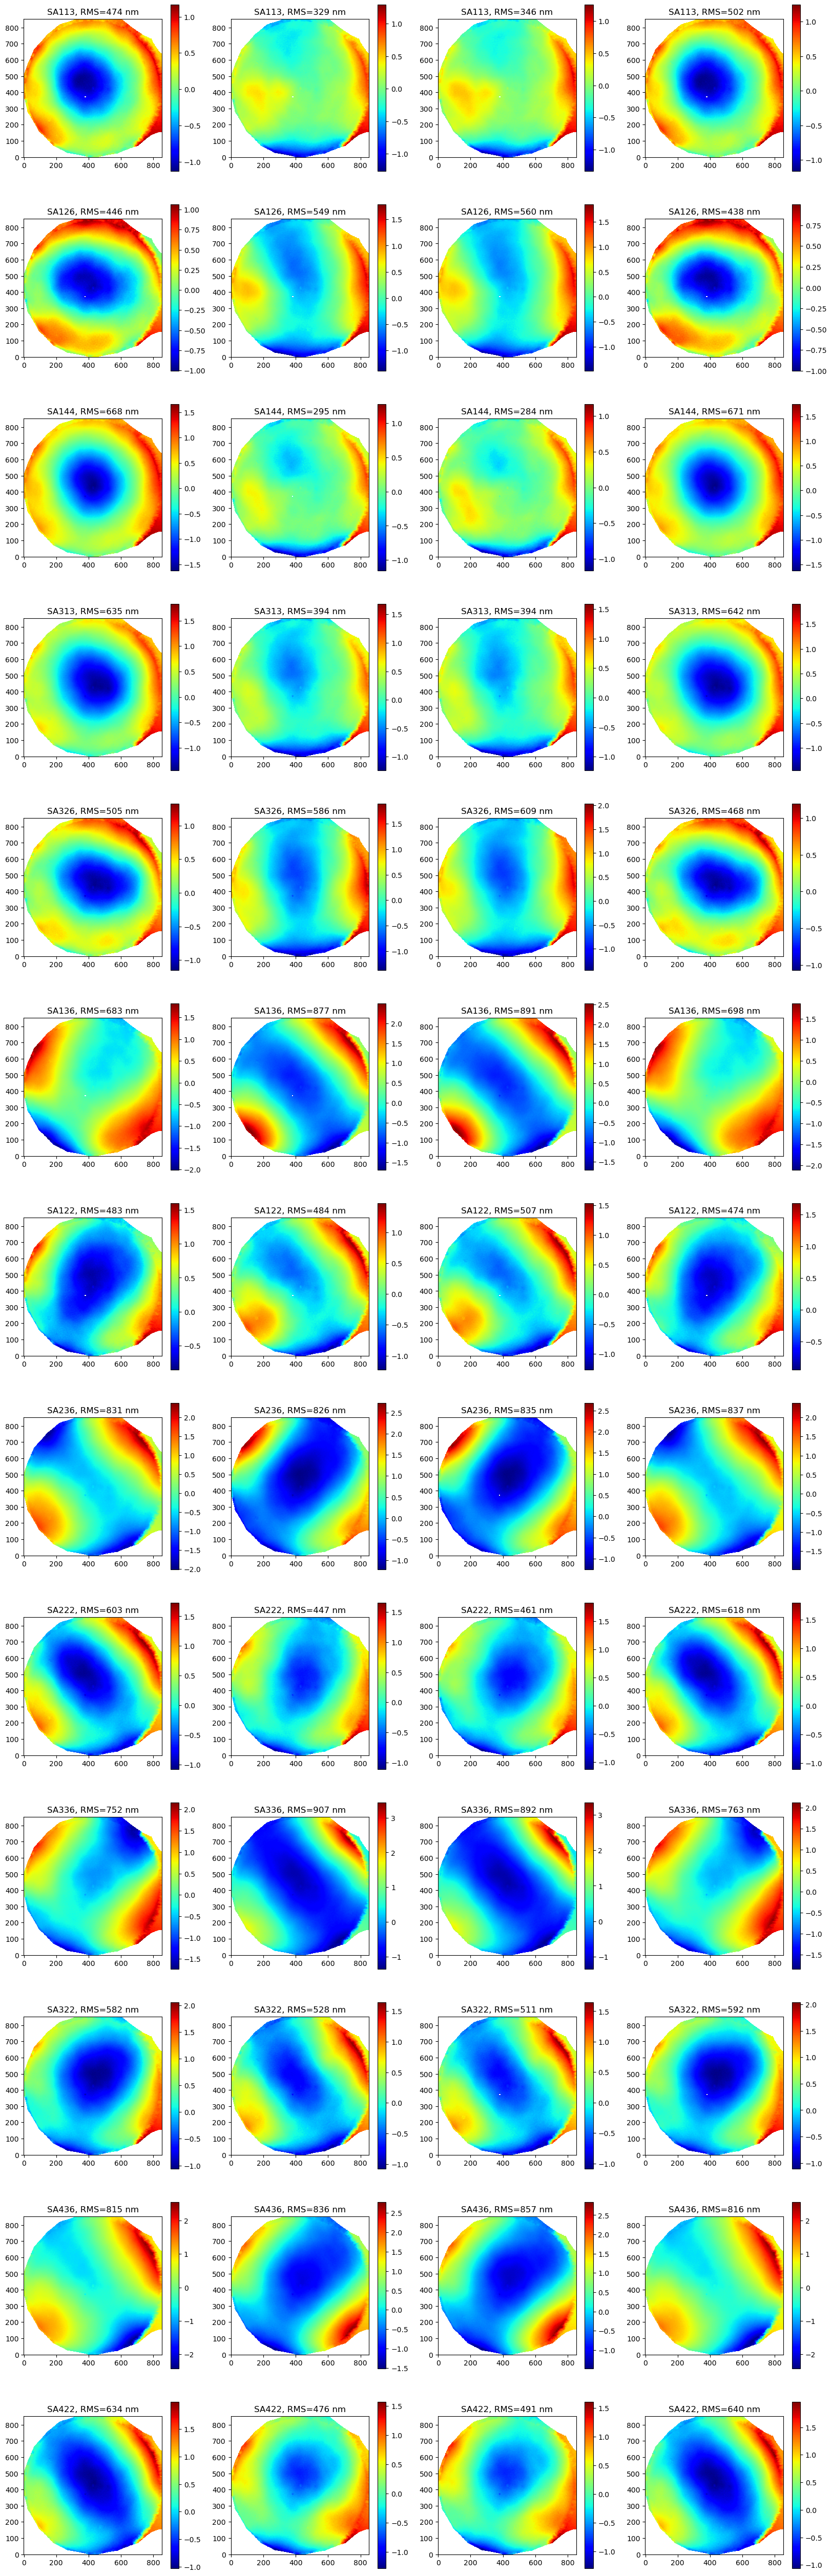

In [17]:
fig, ax = plt.subplots(nSA,4,figsize=(20,5*nSA))
i = 0
for mysaID in TR_IDs_unique:

    signedBend = ['set1*act%d +'%mysaID, 'set1*act%d -'%mysaID,'set2*act%d -'%mysaID, 'set2*act%d +'%mysaID ]
    for bend in signedBend:
        irow = np.int8(i/4)
        icol = np.mod(i,4)
        i += 1

        globstring = '%s/Sec 9/%s*%s*.h5'%(ml_data_dir,dateID, bend)
        #print(globstring)
        fileset = sorted(glob.glob(globstring))
        #print(fileset)
        m1s,centerRow1,centerCol1,pixelSize1, ts = readH5Map(fileset)
        m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm

        img = ax[irow][icol].imshow(m1s, origin='lower')
        fig.colorbar(img, ax=ax[irow][icol])
        ax[irow][icol].set_title('SA%d, RMS=%.0f nm'%(mysaID, m1rms))

In [ ]:


        modeID = np.argmax(saID==mysaID)+1
        irow = np.int8(i/5)
        icol = np.mod(i,5)
        i += 1

        img = ax[irow][icol].scatter(nodex, nodey,10, Afz[:,modeID-1])
        if mysaID in TR_IDs[:10]:
            ax[irow][icol].set_title('SA ID=%d/%d'%(saID[modeID-1], saID[modeID-1]+1000))
        else:
            ax[irow][icol].set_title('SA ID=%d'%(saID[modeID-1]))
        circle = plt.Circle((sax[modeID-1], say[modeID-1]),0.1, fill=False)
        ax[irow][icol].add_artist(circle)
endMode = i
for i in range(endMode, nrow*5):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    ax[irow][icol].axis('off')

In [ ]:


        print('%s Influence function %s --- Actuator %d --- irow = %d, icol = %d, -----------------------------'%(
            testID, modeID, mode2actID[modeID-1], irow, icol))
        fileset = sorted(glob.glob('%s/Processed/%d_%s Influence Functions/%d %s M3 if%s*burst*morph -.h5'%(
            dataDir, dateID, testID, dateID, testID, bend)))
        m3s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm

        img = ax[irow][icol].imshow(m3s, origin='lower')
        fig.colorbar(img, ax=ax[irow][icol])
        ax[irow][icol].set_title('%d, act%d,%s, RMS_M1=%.0f nm'%(modeID, mode2actID[modeID-1], bend[0], m3rms))